# FrozenLake MDP
# Assignment

- In this assignment you will learn how to tackle problems with limited state spaces.
- In particular we consider the FrozenLake MDP problem.

# Outline

- Part 0 introduces us to [gym](https://gymnasium.farama.org/), an environment that allows us to test our reinforcement learning algorithms in various problems
- Implement Q-Learning and SARSA

# Recall: FrozenLake-v1 environment in Gym
- We look [FrozenLake-v1 environment](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) in gym. 
- You don't need to write any code for this part
- you should still understand the code to help you solve Part 2


In [1]:
import os
# You will need numpy and gym. You can try running the following lines to install them
# The assignment is tested on Python3.8 so in case you are having installation issues you might 
# want to try installing that version. 

# !{os.sys.executable} -m pip install numpy
# !{os.sys.executable} -m pip install gymnasium
# !{os.sys.executable} -m pip install Pillow
# !{os.sys.executable} -m pip install ipython
# !{os.sys.executable} -m pip install pygame

import gymnasium as gym
import numpy as np
from PIL import Image
from IPython.display import display
import random

In [2]:
# Import the environment we will use in this assignment
env=gym.make('FrozenLake-v1',is_slippery=True, render_mode="rgb_array")

# Note: If you have installed the newest gym version, FrozenLake-v0 might not be available. In this case, instead of env=gym.make('FrozenLake-v0') you can use:
# env=gym.make('FrozenLake-v1',is_slippery=True)

# Show the model
print(f"Number of States {env.observation_space.n}, Number of Actions {env.action_space.n}")
print(f"Reward range {env.reward_range}")

Number of States 16, Number of Actions 4
Reward range (0, 1)


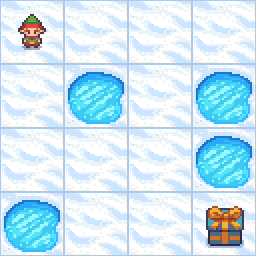

In [3]:
env.reset()
display(Image.fromarray(env.render()))

# Part 2 - Model-Free Control

Recall that in Part 1 you implemented Policy Iteration with Policy Evaluation and Policy Improvement. However this required knowledge of the model (i.e. `env.P`). In this section we study methods that do not require knowing the model.

# Q-Learning
* In this part you will implement Q-Learning with epsilon-greedy exploration to find the optimal policy.  
  * You can experiment with fixed and adaptive learning rate and epsilon
  * Report your best result and mention the differences you observed in answer to final questions


In [36]:
# Initialize Running Parameters. 
# You should try to maintain the *number of episodes* and *max length of episode* at these numbers for your final results
# However feel free to modify them for debugging purposes
num_episodes       = 5000
episode_max_length = 100

# initialize discount factor and learning rate
gamma     = 0.95
learnRate = 0.6
decay = -0.005

#create Q table
Q=np.zeros([env.observation_space.n,env.action_space.n]) #matrix Q[s,a]

reward_of_episodes = [] # list containing total reward of each episode (these rewards don't need to be discounted)
epsilon = 1.0

#execute in episodes
for episode in range(num_episodes):
    
    # reset the environment at the beginning of an episode
    state = env.reset()[0]
    # state = env...
    tot_rew = 0

    for t in range(episode_max_length):
        # generate a random number first
        random_num = random.uniform(0, 1)
        
        # SELECT ACTION a for your current state using Q-values
        # for example, choosing greedily:
        #action = np.argmax(Q[state,:])
        if random_num > epsilon:
            action = np.argmax(Q[state,:])
        else:
            action = env.action_space.sample()
        
        # new state, reward, done
        newstate, reward, finished, _, _ = env.step(action)       

        tot_rew += reward
        # update Q(state,action)
        temp = learnRate * (reward + gamma * np.max(Q[newstate, :]) - Q[state, action])
        Q[state, action] = Q[state, action] + temp

        # stop if we have reached terminal state 
        if finished == True:
            break
        # update state
        state = newstate
        # newstate = state 
    # adjust epsilon
    # learnRate = max(0.01, learnRate + decay)
    epsilon = max(0.01, epsilon + decay)
    reward_of_episodes.append(tot_rew)

- Construct `reward_of_episodes`, a list with the total rewards of each episode (these rewards do not need to be discounted)
- Plot the moving average of the list
- Ideally you want to achieve a reward greater than 0.7 (the problem is technically considered solved for 0.78)

In [37]:
from numpy import convolve, ones
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'valid')
from pylab import plot

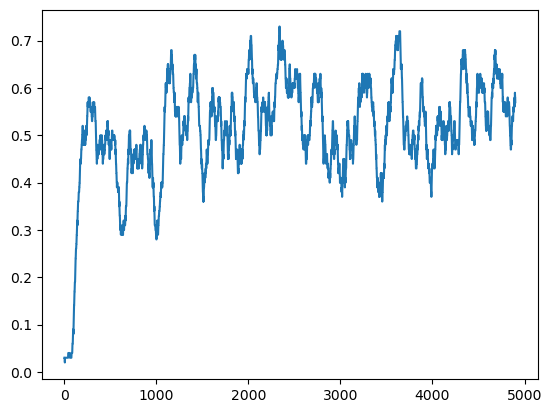

In [38]:
# Plot the moving average of total undiscounted reward across episodes here
rm=movingaverage(reward_of_episodes, 100)
plot(rm)

#  SARSA

- In the following you will implement SARSA with epsilon-greedy exploration.  
    - You can experiment with fixed and adaptive learning rate and epsilon
    - Report your best result and mention the differences you observed in answer to final questions

In [53]:
#initialize episodic structure - again try to maintain these two parameters as they are for your final submission
num_episodes=5000
episode_max_length=100

#initialize discount factor, learning rate
gamma=0.95
learnRate=0.8
decay2 = -0.01

#create Q table
Q=np.zeros([env.observation_space.n,env.action_space.n]) #matrix Q[s,a]

reward_of_episodes = [] # list containing total reward of each episode
epsilon2 = 1.0

#execute in episodes
for episode in range(num_episodes):
    
    # reset the environment at the beginning of an episode 
    # and other possible initializations here
    state2 = env.reset()[0]
    tot_rew = 0
    # initial state setup
    if random.uniform(0, 1) > epsilon2:
        action = np.argmax(Q[state2, :])
    else:
        action = env.action_space.sample()
   
    for t in range(episode_max_length):
        # state2, reward, done, info = ....
        newstate2, reward, finished, _, _ = env.step(action)  
        tot_rew += reward   

        # what is the next action?
        if random.uniform(0, 1) > epsilon2:
            next_action = np.argmax(Q[newstate2, :])
        else:
            next_action = env.action_space.sample()
        # update Q[state,action]
        temp = learnRate * (reward + gamma * Q[newstate2, next_action] - Q[state2, action])
        Q[state2, action] += temp

        # other updates 
        # stop if we have reached terminal state 
        if finished == True:
            break
        # update state
        state2, action = newstate2, next_action
    # adjust epsilon
    # learnRate = max(0.01, learnRate + decay)
    epsilon2 = max(0.01, epsilon2 * np.exp(decay2))
    reward_of_episodes.append(tot_rew)

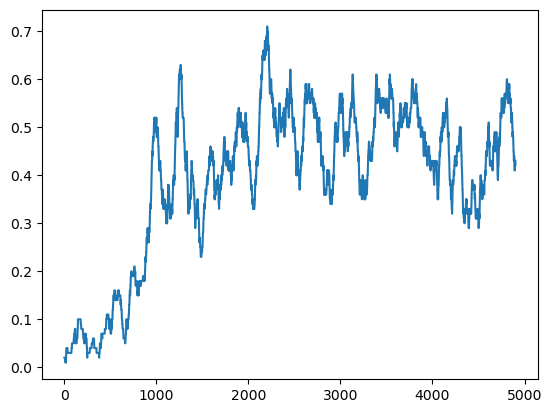

In [54]:
# Plot the moving average of total reward across episodes here
rm=movingaverage(reward_of_episodes, 100)
plot(rm)